In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

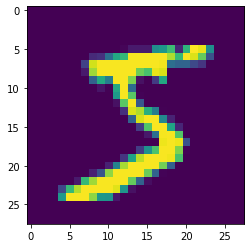

In [8]:
plt.imshow(x_train[0])

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
y_test = to_categorical(y_test)

In [13]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),
                input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [25]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1421 - accuracy: 0.9581 - val_loss: 0.0549 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0528 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0434 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0403 - val_accuracy: 0.9880


In [26]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

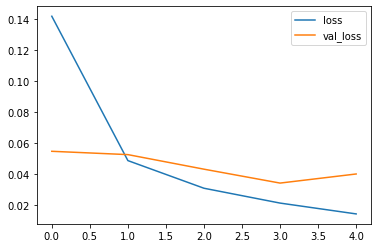

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
predictions = model.predict(x_test)
predictions = np.round(predictions)

In [34]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       992
           1       1.00      0.99      0.99      1144
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1017
           4       0.99      0.99      0.99       981
           5       0.99      0.98      0.99       899
           6       0.98      1.00      0.99       939
           7       0.99      0.98      0.99      1043
           8       0.97      1.00      0.98       950
           9       0.97      0.99      0.98       989

   micro avg       0.99      0.99      0.99      9986
   macro avg       0.99      0.99      0.99      9986
weighted avg       0.99      0.99      0.99      9986
 samples avg       0.99      0.99      0.99      9986



C:\Users\AJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
